### handle imbalanced data
 1.up sampling 
 2.down sampling

In [2]:
import numpy as np
import pandas as pd

np.random.seed(123)
n_samples=1000
class_0_ratio=0.9
n_class_0=int(n_samples*class_0_ratio)
n_class_1=n_samples -n_class_0

In [3]:
n_class_0,n_class_1

(900, 100)

In [4]:
#create dataset
class_0=pd.DataFrame({
    'feature_1':np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature_2':np.random.normal(loc=0,scale=1,size=n_class_0),
    'target':[0]*n_class_0
})

class_1=pd.DataFrame({
    'feature_1':np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature_2':np.random.normal(loc=2,scale=1,size=n_class_1),
    'target':[1]*n_class_1
})

In [5]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [6]:
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [7]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [8]:
# upsampling

df_minority=df[df['target']==1]
df_majority=df[df['target']==0]


In [9]:
from sklearn.utils import resample
df_minority_upsample=resample(df_minority,
         replace=True,
         n_samples=len(df_majority),
         random_state=42)

In [10]:
df_minority_upsample.shape

(900, 3)

In [11]:
df_minority_upsample.head()

,feature_1,feature_2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1


In [12]:
df_upsampled=pd.concat([df_majority,df_minority_upsample])

In [13]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [14]:
#down sampling
class_0=pd.DataFrame({
    'feature_1':np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature_2':np.random.normal(loc=0,scale=1,size=n_class_0),
    'target':[0]*n_class_0
})

class_1=pd.DataFrame({
    'feature_1':np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature_2':np.random.normal(loc=2,scale=1,size=n_class_1),
    'target':[1]*n_class_1
})
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [15]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [16]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [17]:
from sklearn.utils import resample
df_majority_downsample=resample(df_majority,
                                replace=False,
                                n_samples=len(df_minority),
                                random_state=42)

In [18]:
df_majority_downsample.shape

(100, 3)

In [19]:
df_downsampled=pd.concat([df_minority,df_majority_downsample])


In [20]:
df_downsampled.target.value_counts()

target
1    100
0    100
Name: count, dtype: int64

In [21]:
from sklearn.datasets import make_classification

In [22]:
X,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,
                    weights=[0.90],random_state=123)

In [23]:
import pandas as pd
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)
final_df.head()

        

,f1,f2,target
0,-1.370383,-1.036569,1
1,2.022352,0.599597,0
2,0.232392,1.369993,0
3,0.601162,0.393403,0
4,1.530545,0.822184,0


In [24]:
final_df['target'].value_counts()

target
0    896
1    104
Name: count, dtype: int64

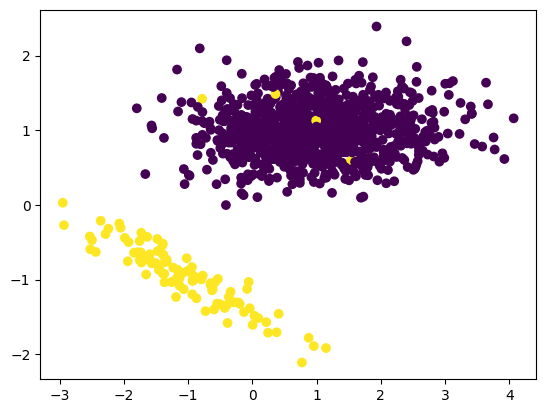

In [25]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [26]:
!pip install imblearn

In [28]:
from imblearn.over_sampling import SMOTE

In [30]:
oversample=SMOTE()
X,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [32]:
X.shape

(1792, 2)

In [34]:
y.shape

(1792,)

In [36]:
len(y[y==0])

896

In [38]:
len(y[y==1])

896

In [40]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)


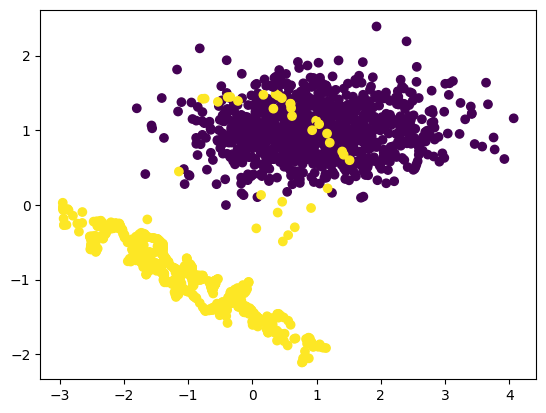

In [42]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])